In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
# for this pset, every parameter is fixed

g_Na = 120
g_K = 20
#g_A = 33 # or 47.7
g_A = 47.7
g_L = 0.3

E_Na = 55
E_K = -72
E_A = -75
E_L = -17

m_shift = -5.3
h_shift = -12
n_shift = -4.3

C = 1

In [89]:
def compute_f(V_list, t_total):
    
    spike_num = 0
    for i in range(len(V_list)-1):
        V_now = V_list[i]
        V_next = V_list[i+1]
        
        if (V_now < 0) & (V_next >0):
            spike_num += 1
    
    return 1000 * spike_num/(t_total) # in second of ms

In [90]:
def run_CS_model(t_list, I):
    
    V = -70 # initial V
    V_list = []
    
    dt = t_list[1] - t_list[0]
    
    m = 0.008
    h = 0.97
    n = 0.14
    A = 0.53
    B = 0.33
    
    
    for i in range(len(t_list)):
        t = t_list[i]
        
        alpha_m = -0.1 * (V + 35 + m_shift )/(np.exp(-(V + 35 + m_shift)/10)-1)
        beta_m = 4 * np.exp(-(V + 60 + m_shift)/18)
        m_inf = alpha_m/(alpha_m + beta_m)
        tau_m = (1/3.8) * (1/(alpha_m + beta_m))
        
        alpha_h = 0.07 * np.exp(-(V + 60 + h_shift)/20)
        beta_h = 1/(np.exp(-(V+ 30 + h_shift)/10)+1)
        h_inf = alpha_h/(alpha_h + beta_h)
        tau_h = (1/3.8) * (1/(alpha_h + beta_h))
        
        alpha_n = -0.01 * (V+50+n_shift)/(np.exp(-(V+50+n_shift)/10)-1)
        beta_n = 0.125 * np.exp(-(V+60 + n_shift)/80)
        n_inf = alpha_n/(alpha_n + beta_n)
        tau_n = (2/3.8) * (1/(alpha_n + beta_n))
        
        A_inf = (0.0761 * np.exp((V+94.22)/31.84)/(1 + np.exp((V+1.17)/28.93)))**(1/3)
        tau_A = 0.3632 + 1.158/(1 + np.exp((V+55.96)/20.12))
        B_inf = 1/((1+np.exp((V+53.5)/14.54))**4)
        tau_B = 1.24 + 2.678/(1+np.exp((V+50)/16.027))
        
        m = m + dt * (m_inf-m)/tau_m
        h = h + dt * (h_inf-h)/tau_h
        n = n + dt * (n_inf-n)/tau_n
        A = A + dt * (A_inf-A)/tau_A
        B = B + dt * (B_inf-B)/tau_B
        
        dVdt = (1/C) *(I + g_L * (E_L - V) + g_Na*h* (m**3) * (E_Na - V) + 
                       g_K * (n**4) * (E_K - V) + g_A * B * (A**3) * (E_A - V))

        V_new = V + dt * dVdt
        V_list.append(V_new)
        V = V_new
        
    return V_list
    

In [138]:
# dt = 0.01 ms
T_span = 100
t_list = np.linspace(0, T_span,T_span * 100)
I = 50

260.0


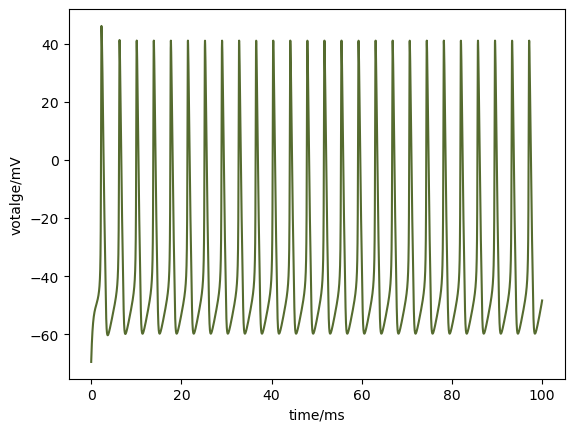

In [139]:
lmao = run_CS_model(t_list, I)
print(compute_f(lmao, T_span))
plt.plot(t_list, lmao, c='darkolivegreen')
plt.xlabel('time/ms')
plt.ylabel('votalge/mV')
plt.show()

In [141]:
t_span_list = [3000, 3000, 3000, ]
'''
TI_list = [[7, 3000], [7.5, 3000],[7.7, 3000], [7.8, 3000], [8, 3000], [8.3, 3000], [8.5, 3000], 
          [8.9, 3000], [9.4, 3000], [9.6, 3000], [10, 3000], [10.5, 3000]]
'''

TI_list = [[7.5, 3000],[7.7, 3000],  [8, 3000],  [8.5, 3000],  [9.6, 3000], [10, 3000], [10.5, 3000], 
          [12, 300], [15, 300], [20, 300], [30, 300], [40, 100], [50, 100], [80, 100], [100, 100]]


In [142]:
I_list = []
f_list = []

for TI in TI_list:
    I = TI[0]
    print(f'cuurent I is {I}')
    T_span = TI[1]
    t_list = np.linspace(0, T_span,T_span * 100)
    V_train = run_CS_model(t_list, I)
    f = compute_f(V_train, T_span)
    I_list.append(I)
    f_list.append(f)


cuurent I is 7.5
cuurent I is 7.7
cuurent I is 8
cuurent I is 8.5
cuurent I is 9.6
cuurent I is 10
cuurent I is 10.5
cuurent I is 12
cuurent I is 15
cuurent I is 20
cuurent I is 30
cuurent I is 40
cuurent I is 50
cuurent I is 80
cuurent I is 100


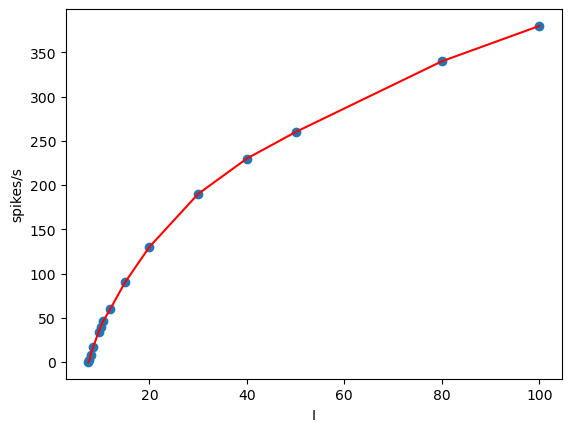

In [143]:
plt.scatter(I_list, f_list)
plt.plot(I_list, f_list, c= 'red')
plt.ylabel('spikes/s')
plt.xlabel('I')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


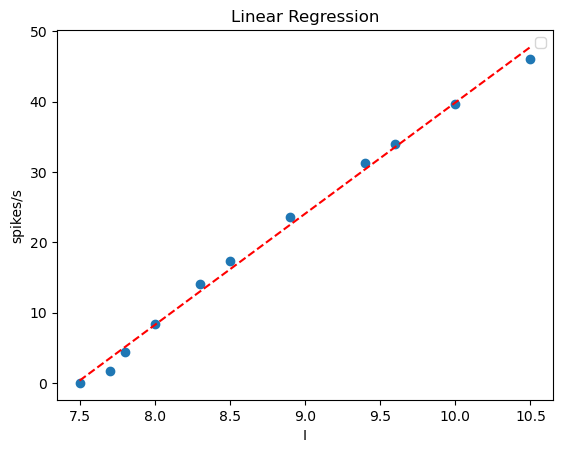

In [129]:
x_list = I_list[1:]
y_list = f_list[1:]

# Perform linear regression
coefficients = np.polyfit(x_list, y_list, 1)
slope, intercept = coefficients

# Create regression line
regression_line = np.polyval(coefficients, x_list)

# Plot the scatter plot
plt.scatter(x_list, y_list)

# Plot the regression line
plt.plot(x_list, regression_line, color='red', linestyle='--')

# Add labels and title
plt.ylabel('spikes/s')
plt.xlabel('I')
plt.title('Linear Regression')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [3]:
V = -70
alpha_m = -0.1 * (V + 35 + m_shift )/(np.exp(-(V + 35 + m_shift)/10)-1)
beta_m = 4 * np.exp(-(V + 60 + m_shift)/18)
m_inf = alpha_m/(alpha_m + beta_m)
print(m_inf)

0.007732244563749294


In [4]:
V = -70     
alpha_h = 0.07 * np.exp(-(V + 60 + h_shift)/20)
beta_h = 1/(np.exp(-(V+ 30 + h_shift)/10)+1)
h_inf = alpha_h/(alpha_h + beta_h)
tau_h = (1/3.8) * (1/(alpha_h + beta_h))
print(h_inf)

0.9745743267670166


In [5]:
V = -70
alpha_n = -0.01 * (V+50+n_shift)/(np.exp(-(V+50+n_shift)/10)-1)
beta_n = 0.125 * np.exp(-(V+60 + n_shift)/80)
n_inf = alpha_n/(alpha_n + beta_n)
tau_n = (2/3.8) * (1/(alpha_n + beta_n))
print(n_inf)

0.13565622869979493


In [6]:
V = -70
A_inf = (0.0761 * np.exp((V+94.22)/31.84)/(1 + np.exp((V+1.17)/28.93)))**(1/3)
B_inf = 1/((1+np.exp((V+53.5)/14.54))**4)
print(A_inf, B_inf)

0.5301807094987238 0.3279060461891697


In [6]:
v = -56
a = 0.1
b = 0.26
matrix = np.array([[0.08 * v + 5, -1],
                   [a*b, -a]])

# Compute eigenvalues
eigenvalues = np.linalg.eigvals(matrix)

# Print the eigenvalues
print("Eigenvalues:", eigenvalues)

Eigenvalues: [ 0.47476405 -0.05476405]
